Import necessary libraries

In [1]:
#!pip install wordcloud

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import tensorflow as tf
import nltk
from nltk.corpus import stopwords
import string


Read the data and perform Data cleaning and Data Preprocessing

In [4]:
data = pd.read_csv("C:\\Users\\Varma\\Desktop\\Online Courses\\Deep learning datasets\\spam.csv",encoding='ISO-8859-1')

In [5]:
data

,label,message,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [6]:
data.drop("Unnamed: 2",axis='columns',inplace=True)

In [7]:
data.drop("Unnamed: 3",axis='columns',inplace=True)

In [8]:
data.drop("Unnamed: 4",axis='columns',inplace=True)


In [9]:
data

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [11]:
print(" Total number of rows in the dataset are", len(data))

 Total number of rows in the dataset are 5572


In [12]:
data.message[data.duplicated()]

102     As per your request 'Melle Melle (Oru Minnamin...
153     As per your request 'Melle Melle (Oru Minnamin...
206     As I entered my cabin my PA said, '' Happy B'd...
222                                Sorry, I'll call later
325                      No calls..messages..missed calls
                              ...                        
5524    You are awarded a SiPix Digital Camera! call 0...
5535    I know you are thinkin malaria. But relax, chi...
5539                           Just sleeping..and surfing
5553                          Hahaha..use your brain dear
5558                               Sorry, I'll call later
Name: message, Length: 403, dtype: object

In [13]:
dup = data.duplicated().sum()
print("There are",dup,"number of duplicated records")

There are 403 number of duplicated records


In [14]:
data.drop_duplicates(inplace=True)
print(data.shape)

(5169, 2)


The below code indicates that there are no null and missing values in the dataset

In [15]:
data['message']

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: message, Length: 5169, dtype: object

In [16]:
print(data.isnull().sum())

label      0
message    0
dtype: int64


In [17]:
data.describe()

,label,message
count,5169,5169
unique,2,5169
top,ham,"Go until jurong point, crazy.. Available only ..."
freq,4516,1


A word cloud (also known as a tag cloud or text cloud) is a visual representation of a text, in which the words appear bigger the more often they are mentioned. Word clouds are great for visualizing unstructured text data and getting insights on trends and patterns.

In [18]:
 ham_msg = data[data.label=='ham']
spam_msg = data[data.label=='spam']

In [19]:
ham_msg

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
6,ham,Even my brother is not like to speak with me. ...
...,...,...
5565,ham,Huh y lei...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [20]:
spam_msg

,label,message
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
5,spam,FreeMsg Hey there darling it's been 3 week's n...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...
11,spam,"SIX chances to win CASH! From 100 to 20,000 po..."
...,...,...
5537,spam,Want explicit SEX in 30 secs? Ring 02073162414...
5540,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547,spam,Had your contract mobile 11 Mnths? Latest Moto...
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...


In [21]:
ham_msg_txt = ham_msg.message.tolist()
ham_msg_txt[:5]

['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
 'Ok lar... Joking wif u oni...',
 'U dun say so early hor... U c already then say...',
 "Nah I don't think he goes to usf, he lives around here though",
 'Even my brother is not like to speak with me. They treat me like aids patent.']

In [22]:
ham_msg_txt = " ".join(ham_msg_txt)
ham_msg_txt

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat... Ok lar... Joking wif u oni... U dun say so early hor... U c already then say... Nah I don\'t think he goes to usf, he lives around here though Even my brother is not like to speak with me. They treat me like aids patent. As per your request \'Melle Melle (Oru Minnaminunginte Nurungu Vettam)\' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune I\'m gonna be home soon and i don\'t want to talk about this stuff anymore tonight, k? I\'ve cried enough today. I\'ve been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times. I HAVE A DATE ON SUNDAY WITH WILL!! Oh k...i\'m watching here:) Eh u remember how 2 spell his name... Yes i did. He v naughty make until i v wet. Fine if thatåÕs the way u feel. ThatåÕs the wa

(-0.5, 799.5, 499.5, -0.5)

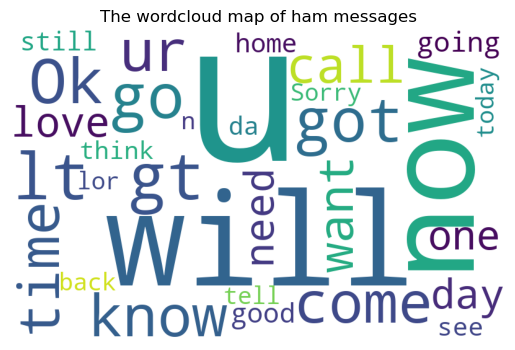

In [23]:
wc = WordCloud(background_color='white', width = 800, height = 500,min_font_size = 10,max_words=30).generate(ham_msg_txt)
plt.imshow(wc)
plt.title("The wordcloud map of ham messages")
plt.axis('off')


In [24]:
spam_msg_txt = spam_msg.message.tolist()
spam_msg_txt[:5]

["Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
 "FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv",
 'WINNER!! As a valued network customer you have been selected to receivea å£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.',
 'Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08002986030',
 'SIX chances to win CASH! From 100 to 20,000 pounds txt> CSH11 and send to 87575. Cost 150p/day, 6days, 16+ TsandCs apply Reply HL 4 info']

In [25]:
spam_msg_txt = " ".join(spam_msg_txt)
spam_msg_txt

'Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C\'s apply 08452810075over18\'s FreeMsg Hey there darling it\'s been 3 week\'s now and no word back! I\'d like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv WINNER!! As a valued network customer you have been selected to receivea å£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only. Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08002986030 SIX chances to win CASH! From 100 to 20,000 pounds txt> CSH11 and send to 87575. Cost 150p/day, 6days, 16+ TsandCs apply Reply HL 4 info URGENT! You have won a 1 week FREE membership in our å£100,000 Prize Jackpot! Txt the word: CLAIM to No: 81010 T&C www.dbuk.net LCCLTD POBOX 4403LDNW1A7RW18 XXXMobileMovieClub: To use your credit, click the WAP link in the next txt messag

(-0.5, 799.5, 499.5, -0.5)

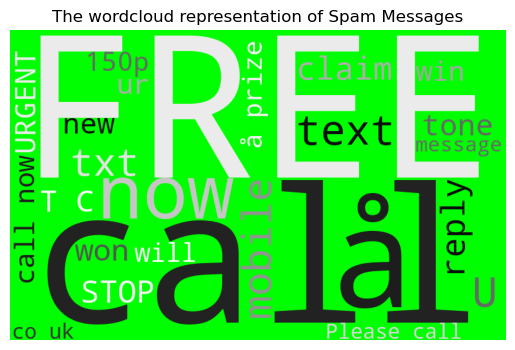

In [26]:
wc = WordCloud(background_color='lime', colormap = 'binary', width = 800, height = 500,min_font_size = 7,max_words=25).generate(spam_msg_txt)
plt.imshow(wc)
plt.title("The wordcloud representation of Spam Messages")
plt.axis('off')


In [27]:
#nltk.download("stopwords")

In [28]:
data['label'].replace({'ham': 0, 'spam': 1},inplace=True)
data

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


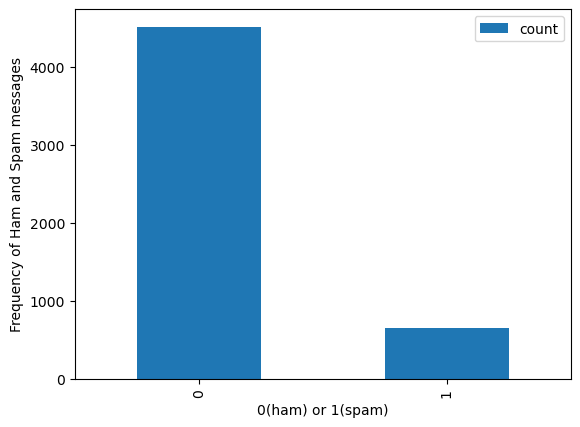

In [29]:
data.label.value_counts().plot(kind='bar')
plt.xlabel('0(ham) or 1(spam)')
plt.ylabel('Frequency of Ham and Spam messages')
plt.legend()

Distribution of ham and spam messages before downsampling


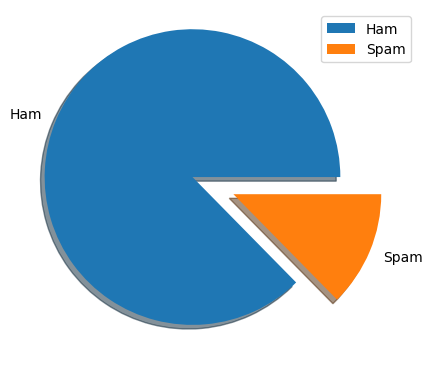

In [30]:
y = [len(data.label[data['label']==0]), len(data.label[data['label']==1])]
mylabels = ["Ham", "Spam"]
myexplode = [0.3, 0]

plt.pie(y, labels = mylabels, explode = myexplode, shadow = True)
plt.legend()
print("Distribution of ham and spam messages before downsampling")
plt.show() 


In [31]:
data['num_characters']=data['message'].apply(len)
data.head()

,label,message,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [32]:
from nltk.tokenize import word_tokenize
data['message'].apply(lambda x: nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: message, Length: 5169, dtype: object

In [33]:
data['num_words']=data['message'].apply(lambda x:len(nltk.word_tokenize(x)))
data.head()

,label,message,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [34]:
data.message[0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [35]:
def process(text):
    nopunc = [char for char in text if char not in string.punctuation] #For removing punctuations
    nopunc = ''.join(nopunc)
    
    clean = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')] #For removing stopwords
    
    from nltk.stem.porter import PorterStemmer
    ps =PorterStemmer()
    clean1 = [ps.stem(word) for word in clean]
    
    
    return " ".join(clean1)
# to show the tokenization

data['transformed message'] = data['message'].apply(process)


In [36]:
data['transformed message'][0]

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

# As you see here, the distribution of ham and spam messages are not equal, i.e, the model becomes biased during the training

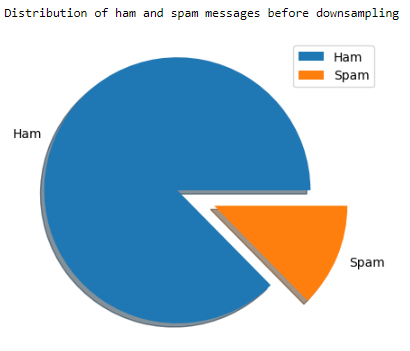

# Downsampling is the process of reducing the samples of the category which is in majority, to the category which is less.

Downsampling is a process that reduces the amount of data for analysis, storage, or processing. It's done by selecting a subset of the data at a lower rate than the original. Downsampling can be used in a variety of contexts, including:

In [37]:
original_len = len(data)
removed_len  = original_len - (2*len(data.label==1))
removed_len

-5169

In [38]:
drop_indices = np.random.choice(data.index[data.label==0], 3863, replace=False)

data.drop(index=list(drop_indices),inplace=True)
data

,label,message,num_characters,num_words,transformed message
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,free entri 2 wkli comp win fa cup final tkt 21...
5,1,FreeMsg Hey there darling it's been 3 week's n...,148,39,freemsg hey darl 3 week word back id like fun ...
8,1,WINNER!! As a valued network customer you have...,158,32,winner valu network custom select receivea å£9...
9,1,Had your mobile 11 months or more? U R entitle...,154,31,mobil 11 month u r entitl updat latest colour ...
10,0,I'm gonna be home soon and i don't want to tal...,109,28,im gonna home soon dont want talk stuff anymor...
...,...,...,...,...,...
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,160,35,contract mobil 11 mnth latest motorola nokia e...
5555,0,Yeh. Indians was nice. Tho it did kane me off ...,153,43,yeh indian nice tho kane bit shud go 4 drink s...
5563,0,Ard 6 like dat lor.,19,6,ard 6 like dat lor
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,147,30,remind o2 get 250 pound free call credit detai...


In [39]:
len(data.index[data.label==0])

653

In [40]:
len(data.index[data.label==1])

653

Distribution of ham and spam images after downsampling


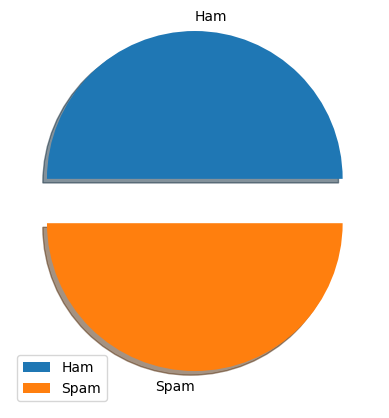

In [41]:
y = [len(data.label[data['label']==0]), len(data.label[data['label']==1])]
mylabels = ["Ham", "Spam"]
myexplode = [0.3, 0]

plt.pie(y, labels = mylabels, explode = myexplode, shadow = True)
plt.legend()
print('Distribution of ham and spam images after downsampling')
plt.show()

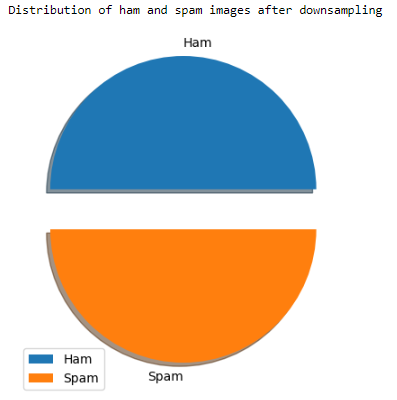

Now, we have to do word embedding

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf= TfidfVectorizer(max_features=300) 
X=tfidf.fit_transform(data['transformed message']).toarray()
y=data['label'].values

In [43]:
print(X.shape)

(1306, 300)


In [44]:
X[3]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.12285209,
       0.        , 0.        , 0.25219108, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.27035013,
       0.        , 0.        , 0.2735795 , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [45]:
y[3]

1

In [46]:
data

,label,message,num_characters,num_words,transformed message
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,free entri 2 wkli comp win fa cup final tkt 21...
5,1,FreeMsg Hey there darling it's been 3 week's n...,148,39,freemsg hey darl 3 week word back id like fun ...
8,1,WINNER!! As a valued network customer you have...,158,32,winner valu network custom select receivea å£9...
9,1,Had your mobile 11 months or more? U R entitle...,154,31,mobil 11 month u r entitl updat latest colour ...
10,0,I'm gonna be home soon and i don't want to tal...,109,28,im gonna home soon dont want talk stuff anymor...
...,...,...,...,...,...
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,160,35,contract mobil 11 mnth latest motorola nokia e...
5555,0,Yeh. Indians was nice. Tho it did kane me off ...,153,43,yeh indian nice tho kane bit shud go 4 drink s...
5563,0,Ard 6 like dat lor.,19,6,ard 6 like dat lor
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,147,30,remind o2 get 250 pound free call credit detai...


In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [48]:
X_train.shape

(875, 300)

In [49]:
X_test.shape

(431, 300)

In [50]:
y_train.shape

(875,)

In [51]:
y_test.shape

(431,)

# Building a model using simple Deep Learning

In [51]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(200, input_shape=(300,), activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(70, activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(5, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=30)

C:\Users\Varma\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.5029 - loss: 0.6908
Epoch 2/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6255 - loss: 0.6347
Epoch 3/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9111 - loss: 0.4027
Epoch 4/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9582 - loss: 0.2919
Epoch 5/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9642 - loss: 0.1184
Epoch 6/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9742 - loss: 0.0892
Epoch 7/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9854 - loss: 0.0613
Epoch 8/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9929 - loss: 0.0437
Epoch 9/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9882 - loss: 0.0525
Epoch 10/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9947 - loss: 0.0295
Epoch 11/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9920 - loss: 0.0313
Epoch 12/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9879 - lo

In [52]:
model.evaluate(X_test, y_test)

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9306 - loss: 0.4787


[0.4058082699775696, 0.9443155527114868]

# As you see, the test loss is 34% and the test accuracy is 92% which is very good

In [53]:
yp = model.predict(X_test)
yp

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


array([[4.83669667e-03],
       [7.39040042e-05],
       [9.94733870e-01],
       [9.93227065e-02],
       [1.00000000e+00],
       [1.50397816e-03],
       [9.84954655e-01],
       [1.00000000e+00],
       [1.00000000e+00],
       [4.89625521e-03],
       [3.64114507e-03],
       [9.93227065e-02],
       [1.14741623e-02],
       [1.00000000e+00],
       [9.93227065e-02],
       [1.60531272e-05],
       [9.93227065e-02],
       [1.00000000e+00],
       [1.00000000e+00],
       [6.23965534e-05],
       [9.99992490e-01],
       [1.00000000e+00],
       [1.86398276e-04],
       [6.73088471e-06],
       [1.00000000e+00],
       [1.48986978e-02],
       [9.99947190e-01],
       [1.00000000e+00],
       [5.70554053e-04],
       [3.59096539e-08],
       [5.02722287e-05],
       [9.99999881e-01],
       [9.99998748e-01],
       [1.60033380e-07],
       [1.00000000e+00],
       [6.07230351e-04],
       [1.00000000e+00],
       [9.88488674e-01],
       [1.86398276e-04],
       [1.87392368e-06],


In [54]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)
type(y_pred[0])
y_pred

[0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,


In [55]:
y_pred[:20]

[0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0]

In [56]:
list(y_test[:20])

[0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0]

In [88]:
from sklearn.metrics import confusion_matrix , classification_report
print("Classification Report of the model using Deep Learning\n")
print("Accuracy score: {}". format(accuracy_score(y_test, y_pred)) )
print("Precision score: {}". format(precision_score(y_test, y_pred)) )
print("Recall score: {}". format(recall_score(y_test, y_pred)))
print("F1 score: {}". format(f1_score(y_test, y_pred)))

Classification Report of the model using Deep Learning

Accuracy score: 0.9466357308584686
Precision score: 0.98989898989899
Recall score: 0.9032258064516129
F1 score: 0.944578313253012


In [89]:
email_to_classify = input("Enter the message in the email: ")

Enter the message in the email: Congratulations! You've won a free lottery ticket. Click here to claim your prize.


In [90]:
def classify(email_to_classify):
    email_txt = process(email_to_classify)
    email_corpus = [email_txt]
    X_email = tfidf.transform(email_corpus).toarray()
    yp1 = model.predict(X_email)
    y_pred = []
    for element in yp1:
        if element > 0.5:
            y_pred.append(1)
        else:
            y_pred.append(0)
    if y_pred[0] == 1:
        print('SPAM message!!')
    else:
        print('Relax, it\'s a Legitimate/Safe message')

In [91]:
classify(email_to_classify)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
SPAM message!!


Text(0.5, 1.0, 'Confusion Matrix of the model using Deep Learning')

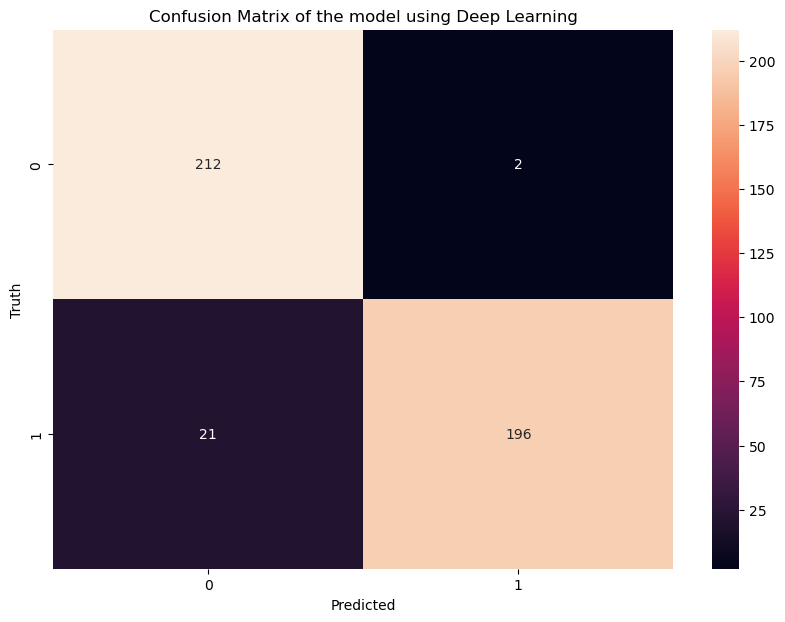

In [92]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title("Confusion Matrix of the model using Deep Learning")

# Building a model using Multinomial Naive Bayes

In [52]:
from sklearn.naive_bayes import MultinomialNB
multinomial_nb_model = MultinomialNB()
multinomial_nb_model.fit(X_train, y_train)

MultinomialNB()

In [53]:
def classify_with_Mul_nb(email_to_classify):
    email_txt = process(email_to_classify)
    email_corpus = [email_txt]
    X_email = tfidf.transform(email_corpus).toarray()
    global yp2 
    yp2 = multinomial_nb_model.predict(X_email)
    y_pred = []
    for element in yp2:
        if element > 0.5:
            y_pred.append(1)
        else:
            y_pred.append(0)
    if y_pred[0] == 1:
        print('SPAM message!!')
    else:
        print('Relax, it\'s a Legitimate/Safe message')


In [63]:
email_to_classify = input("Enter the message in the email: ")

Enter the message in the email: Hello Manoj, how are you? I just wanted you to come to my marriage definitely.


In [65]:
classify_with_Mul_nb(email_to_classify)

Relax, it's a Legitimate/Safe message


In [66]:
yp2[:10]

array([0], dtype=int64)

In [67]:
y_test[:10]

array([0, 1, 0, 1, 1, 1, 1, 0, 0, 0], dtype=int64)

In [68]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_pred1 = multinomial_nb_model.predict(X_test)
print("Classification Report of the model using Multinomial Naive Bayes\n")
print("Accuracy score: {}". format(accuracy_score(y_test, y_pred1)) )
print("Precision score: {}". format(precision_score(y_test, y_pred1)) )
print("Recall score: {}". format(recall_score(y_test, y_pred1)))
print("F1 score: {}". format(f1_score(y_test, y_pred1)))


Classification Report of the model using Multinomial Naive Bayes

Accuracy score: 0.8723897911832946
Precision score: 0.8590909090909091
Recall score: 0.8873239436619719
F1 score: 0.8729792147806005


Text(0.5, 1.0, 'Confusion Matrix of the model using Multinomial Naive Bayes')

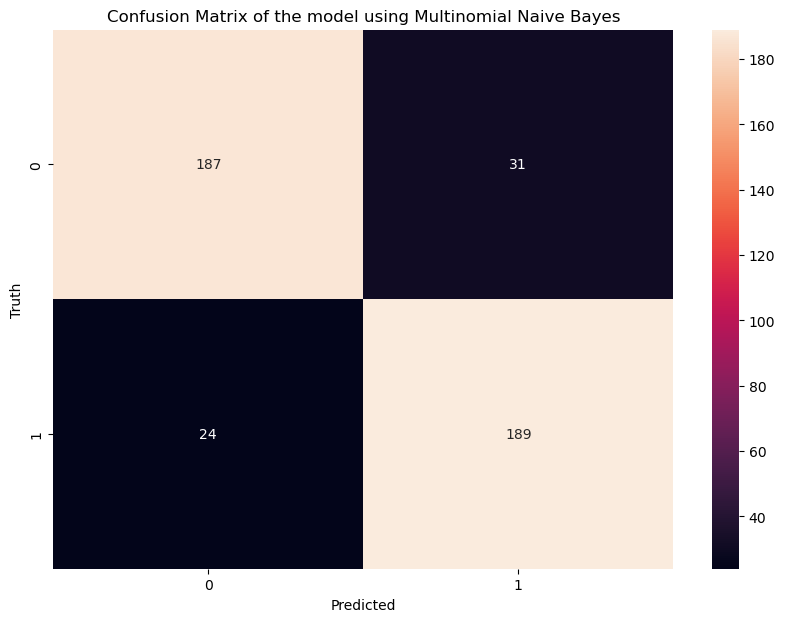

In [69]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred1)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title("Confusion Matrix of the model using Multinomial Naive Bayes")

# Building a model using Random Forest Classifier

In [71]:
from sklearn.ensemble import RandomForestClassifier  
random_forest_model= RandomForestClassifier()  
random_forest_model.fit(X_train, y_train) 

RandomForestClassifier()

In [72]:
def classify_with_Randomfc(email_to_classify):
    email_txt = process(email_to_classify)
    email_corpus = [email_txt]
    X_email = tfidf.transform(email_corpus).toarray()
    global p 
    p = random_forest_model.predict(X_email)
    y_pred = []
    for element in p:
        if element > 0.5:
            y_pred.append(1)
        else:
            y_pred.append(0)
    if y_pred[0] == 1:
        print('SPAM message!!')
    else:
        print('Relax, it\'s a Legitimate/Safe message')

In [73]:
email_to_classify = input("Enter the message in the email: ")

Enter the message in the email: Congratulations! You've won a free lottery ticket. Click here to claim your prize.


In [74]:
classify_with_Randomfc(email_to_classify)

SPAM message!!


In [75]:
p

array([1], dtype=int64)

In [93]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_pred2 = random_forest_model.predict(X_test)
print("Classification Report of model using Random Forest Classifier\n")
print("Accuracy score: {}". format(accuracy_score(y_test, y_pred2)) )
print("Precision score: {}". format(precision_score(y_test, y_pred2)) )
print("Recall score: {}". format(recall_score(y_test, y_pred2)))
print("F1 score: {}". format(f1_score(y_test, y_pred2)))

Classification Report of model using Random Forest Classifier

Accuracy score: 0.9211136890951276
Precision score: 0.9420289855072463
Recall score: 0.8986175115207373
F1 score: 0.9198113207547169


Text(0.5, 1.0, 'Confusion Matrix of the model using Random Forest Classifier')

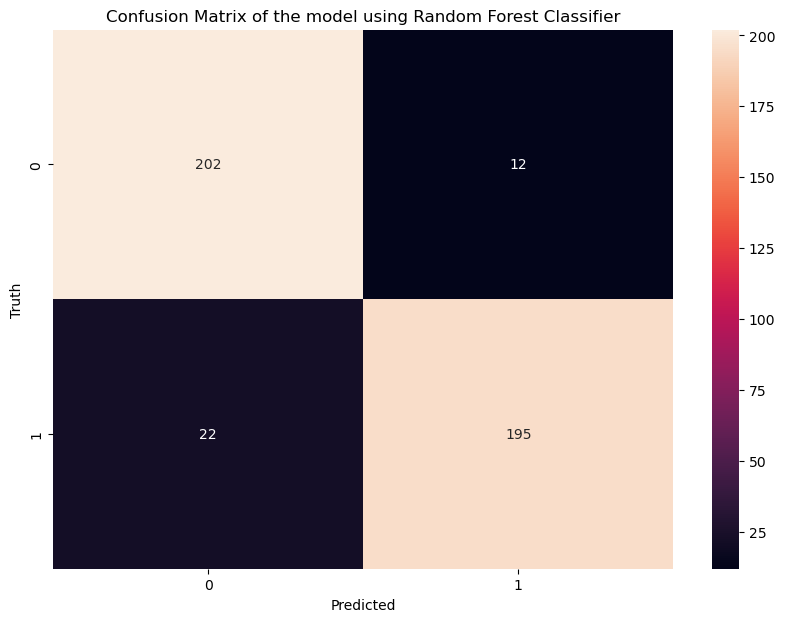

In [86]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred2)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title("Confusion Matrix of the model using Random Forest Classifier")